In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import methylcheck
import methylprep
import random
import seaborn as sns
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
LOCAL = Path('/Volumes/LEGX/GSE69852/idats/')

In [7]:
# turn off noob and poobah this way
c1 = methylprep.processing.pipeline.make_pipeline(
    data_dir=LOCAL,
    steps=[],
    exports=['meth'],
    estimator=None)

INFO:methylprep.processing.pipeline:Running pipeline in: /Volumes/LEGX/GSE69852/idats
Getting raw datasets: 100%|██████████| 2/2 [00:00<00:00, 5450.69it/s]
INFO:methylprep.files.manifests:Reading manifest file: HumanMethylation450_15017482_v1-2.CoreColumns.csv
Processing samples: 100%|██████████| 2/2 [00:16<00:00,  8.24s/it]
INFO:methylprep.processing.pipeline:[finished SampleDataContainer processing]
INFO:methylprep.processing.pipeline:saved meth_values.pkl
INFO:methylprep.processing.pipeline:saved unmeth_values.pkl


In [3]:
c2 = methylprep.processing.pipeline.make_pipeline(
    data_dir=LOCAL,
    steps=['all'],
    exports=['all'],
    estimator=None)

INFO:methylprep.processing.pipeline:Running pipeline in: /Volumes/LEGX/GSE69852/idats
Getting raw datasets: 100%|██████████| 2/2 [00:00<00:00, 7351.98it/s]
INFO:methylprep.files.manifests:Reading manifest file: HumanMethylation450_15017482_v1-2.CoreColumns.csv
Processing samples: 100%|██████████| 2/2 [00:45<00:00, 22.60s/it]
INFO:methylprep.processing.pipeline:[finished SampleDataContainer processing]
INFO:methylprep.processing.pipeline:saved noob_meth_values.pkl
INFO:methylprep.processing.pipeline:saved noob_unmeth_values.pkl
INFO:methylprep.processing.pipeline:saved meth_values.pkl
INFO:methylprep.processing.pipeline:saved unmeth_values.pkl
INFO:methylprep.processing.pipeline:[!] Exported results (csv) to: ['/Volumes/LEGX/GSE69852/idats/9247377085', '/Volumes/LEGX/GSE69852/idats/9247377093']
INFO:methylprep.processing.pipeline:saved poobah_values.pkl
INFO:methylprep.processing.pipeline:saved sample_sheet_meta_data.pkl
INFO:methylprep.processing.pipeline:saved control_probes.pkl


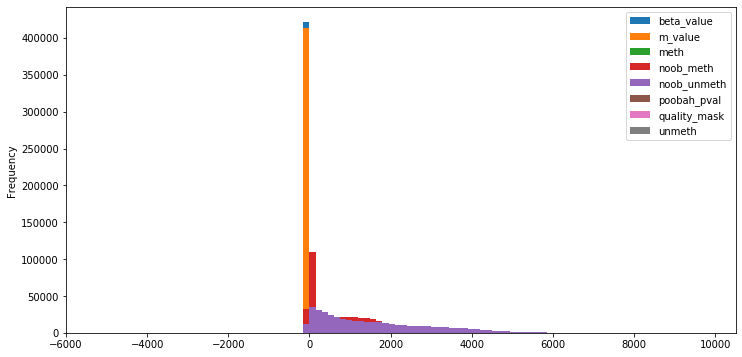

In [4]:
(c1[0]._SampleDataContainer__data_frame - c2[0]._SampleDataContainer__data_frame).plot.hist(bins=100, figsize=(12,6))

beta_value


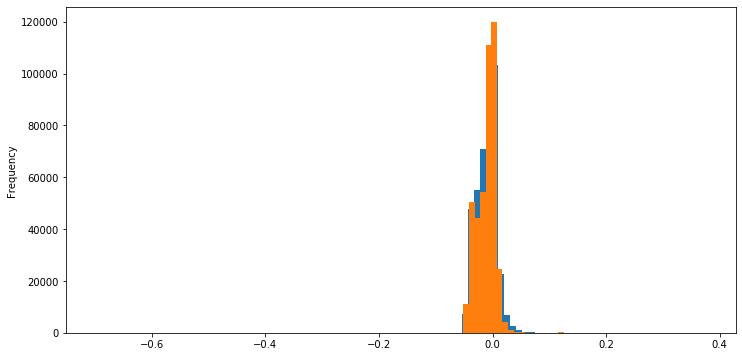

m_value


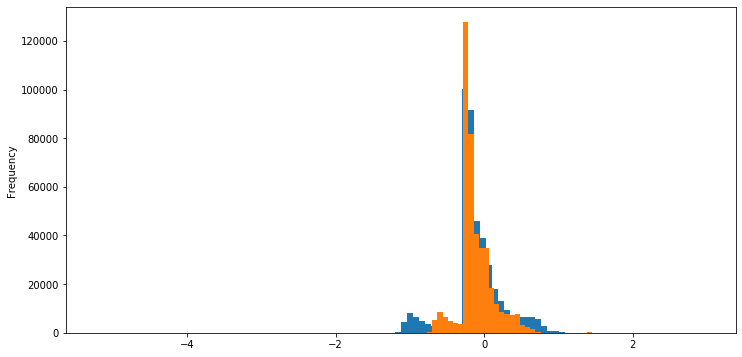

noob_meth


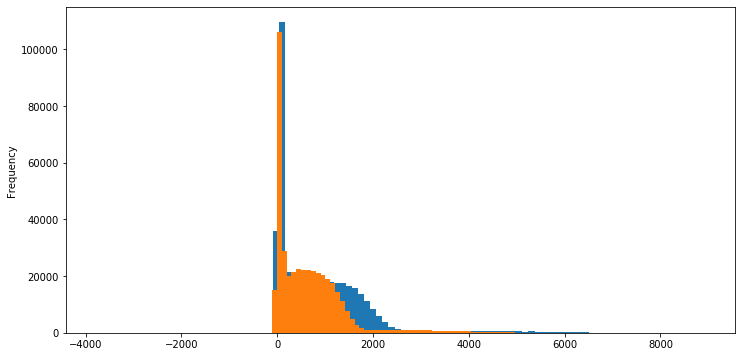

noob_unmeth


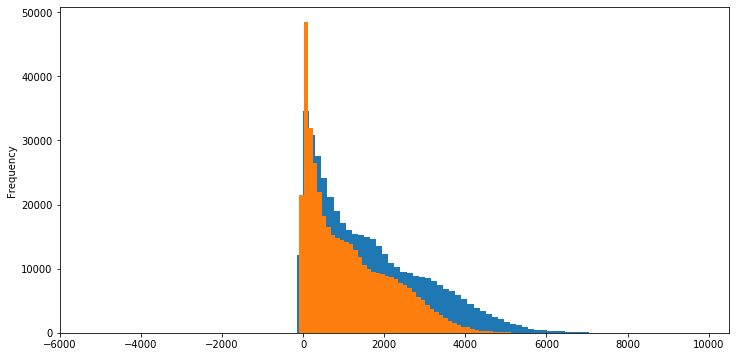

meth


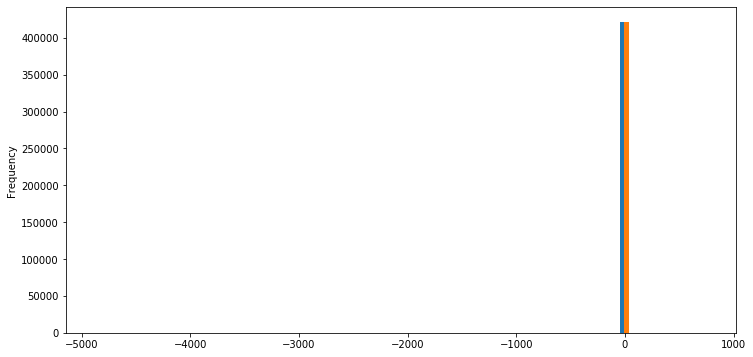

unmeth


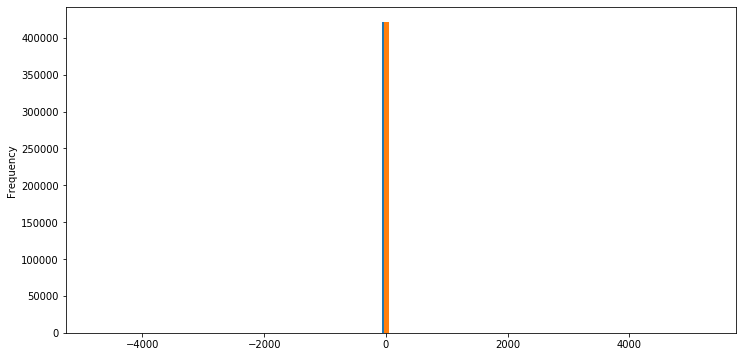

In [10]:
cols = ['beta_value', 'm_value', 'noob_meth', 'noob_unmeth', 'meth', 'unmeth']
for col in cols:
    print(col)
    (c1[0]._SampleDataContainer__data_frame[col] - c2[0]._SampleDataContainer__data_frame[col]).plot.hist(bins=100, figsize=(12,6))
    (c1[1]._SampleDataContainer__data_frame[col] - c2[1]._SampleDataContainer__data_frame[col]).plot.hist(bins=100, figsize=(12,6))
    plt.show()

In [8]:
c1[0]._SampleDataContainer__data_frame

,noob_meth,noob_unmeth,meth,unmeth,beta_value,m_value
IlmnID,,,,,,
cg00035864,2021.0,4477.0,2580.0,2712.0,0.306305,-1.147072
cg00061679,5927.0,5247.0,6486.0,3128.0,0.525723,0.175778
cg00063477,5740.0,299.0,6299.0,441.0,0.935006,4.258268
cg00121626,3792.0,7529.0,4351.0,4361.0,0.332020,-0.989311
cg00223952,253.0,11852.0,751.0,6697.0,0.020729,-5.544280
...,...,...,...,...,...,...
cg27614706,5783.0,219.0,3418.0,375.0,0.947722,4.716492
cg27619353,7364.0,14547.0,4272.0,8153.0,0.334560,-0.982063
cg27620176,11510.0,158.0,6512.0,300.0,0.978076,6.177843


In [13]:
# turn off noob and poobah this way
c3 = methylprep.processing.pipeline.run_pipeline(
    data_dir=LOCAL, save_uncorrected=True, poobah=True)

INFO:methylprep.processing.pipeline:Running pipeline in: /Volumes/LEGX/GSE69852/idats
Getting raw datasets: 100%|██████████| 2/2 [00:00<00:00, 8765.53it/s]
INFO:methylprep.files.manifests:Reading manifest file: HumanMethylation450_15017482_v1-2.CoreColumns.csv
Processing samples: 100%|██████████| 2/2 [00:41<00:00, 20.79s/it]
INFO:methylprep.processing.pipeline:[finished SampleDataContainer processing]
INFO:methylprep.processing.pipeline:saved noob_meth_values.pkl
INFO:methylprep.processing.pipeline:saved noob_unmeth_values.pkl
INFO:methylprep.processing.pipeline:saved meth_values.pkl
INFO:methylprep.processing.pipeline:saved unmeth_values.pkl
INFO:methylprep.processing.pipeline:saved sample_sheet_meta_data.pkl


In [14]:
c3[0]._SampleDataContainer__data_frame

,noob_meth,noob_unmeth,poobah_pval,quality_mask,meth,unmeth,beta_value,m_value
IlmnID,,,,,,,,
cg00035864,NaN,NaN,0.002,NaN,NaN,NaN,NaN,NaN
cg00061679,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN
cg00063477,4723.0,287.0,0.000,1.0,6299.0,441.0,0.924266,4.035868
cg00121626,3108.0,5171.0,0.001,1.0,4351.0,4361.0,0.370927,-0.734272
cg00223952,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
cg27614706,NaN,NaN,0.003,NaN,NaN,NaN,NaN,NaN
cg27619353,5060.0,9912.0,0.000,1.0,4272.0,8153.0,0.335722,-0.969899
cg27620176,7860.0,191.0,0.000,1.0,6512.0,300.0,0.964299,5.355535


beta_value


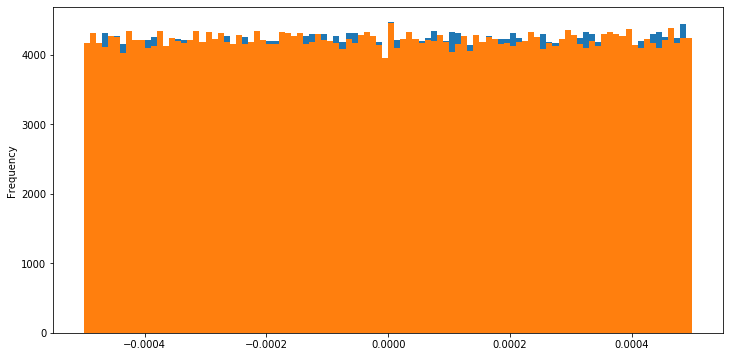

m_value


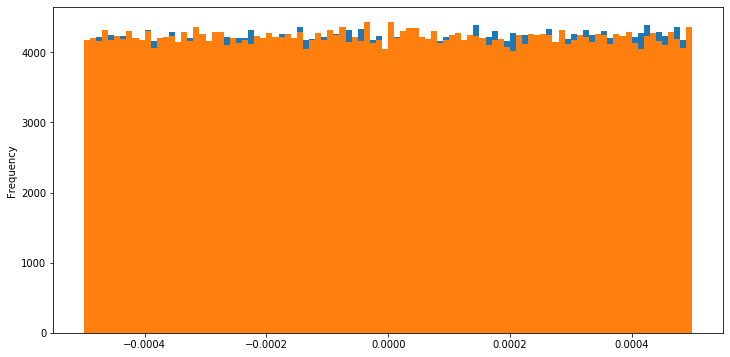

noob_meth


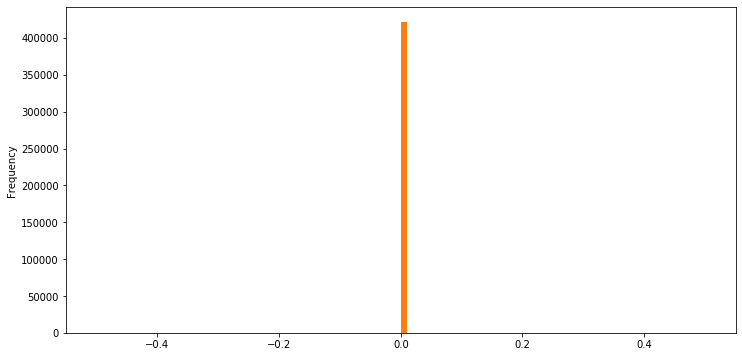

noob_unmeth


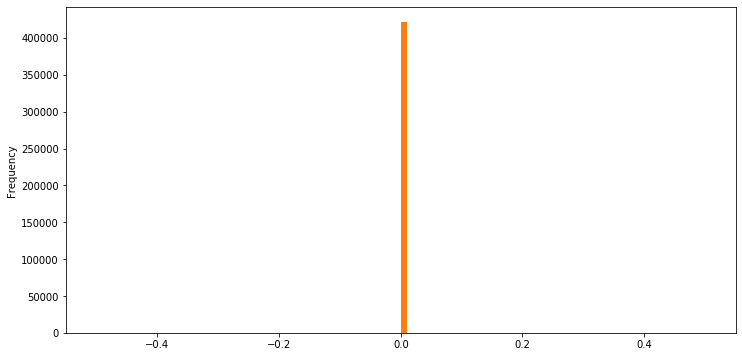

meth


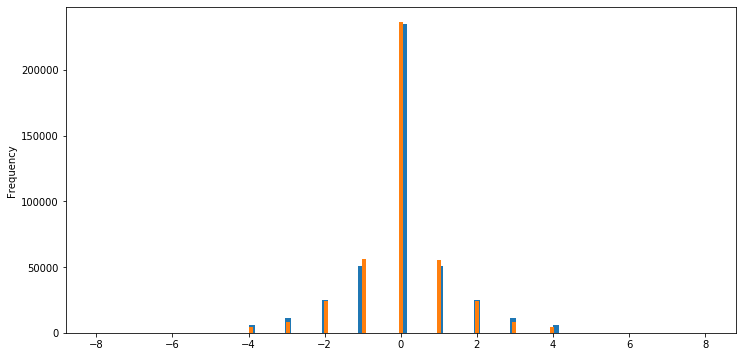

unmeth


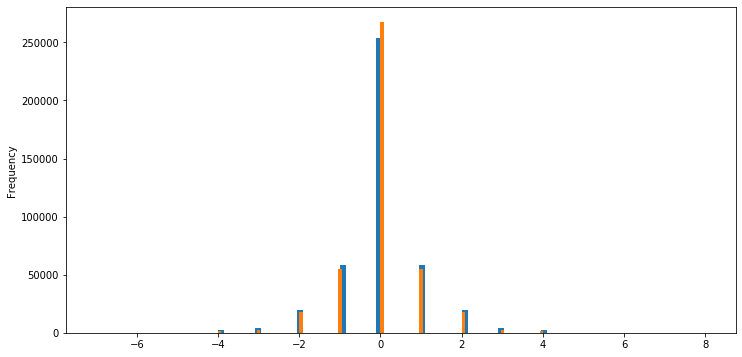

In [18]:
cols = ['beta_value', 'm_value', 'noob_meth', 'noob_unmeth', 'meth', 'unmeth']
for col in cols:
    print(col)
    (c3[0]._SampleDataContainer__data_frame[col] - c2[0]._SampleDataContainer__data_frame[col]).plot.hist(bins=100, figsize=(12,6))
    (c3[1]._SampleDataContainer__data_frame[col] - c2[1]._SampleDataContainer__data_frame[col]).plot.hist(bins=100, figsize=(12,6))
    plt.show()